In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import itertools
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator

In [7]:

path='D:\\rib resize\\'
images=[]
for i in range(246):
    name=path+str(i)+".png"
    print(name)
    im=cv2.imread(name)
    print(im.shape)
    images.append(im)

D:\rib resize\0.png
(100, 100, 3)
D:\rib resize\1.png
(100, 100, 3)
D:\rib resize\2.png
(100, 100, 3)
D:\rib resize\3.png
(100, 100, 3)
D:\rib resize\4.png
(100, 100, 3)
D:\rib resize\5.png
(100, 100, 3)
D:\rib resize\6.png
(100, 100, 3)
D:\rib resize\7.png
(100, 100, 3)
D:\rib resize\8.png
(100, 100, 3)
D:\rib resize\9.png
(100, 100, 3)
D:\rib resize\10.png
(100, 100, 3)
D:\rib resize\11.png
(100, 100, 3)
D:\rib resize\12.png
(100, 100, 3)
D:\rib resize\13.png
(100, 100, 3)
D:\rib resize\14.png
(100, 100, 3)
D:\rib resize\15.png
(100, 100, 3)
D:\rib resize\16.png
(100, 100, 3)
D:\rib resize\17.png
(100, 100, 3)
D:\rib resize\18.png
(100, 100, 3)
D:\rib resize\19.png
(100, 100, 3)
D:\rib resize\20.png
(100, 100, 3)
D:\rib resize\21.png
(100, 100, 3)
D:\rib resize\22.png
(100, 100, 3)
D:\rib resize\23.png
(100, 100, 3)
D:\rib resize\24.png
(100, 100, 3)
D:\rib resize\25.png
(100, 100, 3)
D:\rib resize\26.png
(100, 100, 3)
D:\rib resize\27.png
(100, 100, 3)
D:\rib resize\28.png
(100, 100

In [8]:
print(type(images))

<class 'list'>


In [9]:
labels = []
for i in range(154):
    labels.append(1)
for i in range(92):
    labels.append(0)

In [10]:
len(labels)
labels = np.array(labels)

In [11]:
df = pd.DataFrame({'image': list(images), 'target': labels}, columns=['image', 'target'])

Class 0: 92
Class 1: 154
Proportion: 0.6 : 1


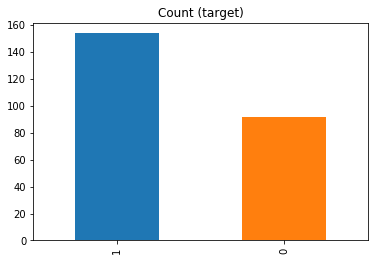

In [12]:
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [13]:
# Class count
count_class_0, count_class_1 = 92,154

# Divide by class
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

Random over-sampling:
1    154
0    154
Name: target, dtype: int64


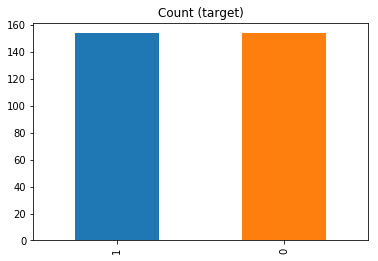

In [14]:
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over = pd.concat([df_class_0_over, df_class_1], axis=0)

print('Random over-sampling:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

In [15]:
x = df_test_over['image'].values


In [16]:
x.shape

(308,)

In [17]:
type(x)

numpy.ndarray

In [18]:
x = np.array(x)
x.shape

(308,)

In [19]:
new_list = []
for i in x:
    new_list.append(i)

In [20]:
new_list = np.array(new_list)
new_list.shape

(308, 100, 100, 3)

In [21]:
y = df_test_over['target']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

x_train, x_test, y_train, y_test = train_test_split(new_list,y)

In [23]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

231
77
231
77


In [24]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1])

In [23]:
x_train.shape

(231, 288, 432, 3)

In [25]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [24]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes = 2)
y_test_oh = to_categorical(y_test, num_classes = 2)

In [26]:
print(y_train_oh.shape)
print(y_test_oh.shape)

(231, 2)
(77, 2)


In [27]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [28]:
batch_size = 16
epochs = 20
num_classes = 2

In [29]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(288,432,3))
vgg_conv.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 288, 432, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 288, 432, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 288, 432, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 144, 216, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 144, 216, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 144, 216, 128)     147584    
_________________________________________________________________
bloc

In [30]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001E89FAE76D8> False
<keras.layers.convolutional.Conv2D object at 0x000001E89FAE7EF0> False
<keras.layers.convolutional.Conv2D object at 0x000001E89FA41BA8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E8A168A6D8> False
<keras.layers.convolutional.Conv2D object at 0x000001E89FAE79B0> False
<keras.layers.convolutional.Conv2D object at 0x000001E896F3C358> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E896F31208> False
<keras.layers.convolutional.Conv2D object at 0x000001E896F31320> False
<keras.layers.convolutional.Conv2D object at 0x000001E896F4C8D0> False
<keras.layers.convolutional.Conv2D object at 0x000001E896EF3240> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E896EBFBE0> False
<keras.layers.convolutional.Conv2D object at 0x000001E896ECEE48> False
<keras.layers.convolutional.Conv2D object at 0x000001E896EC74E0> False
<keras.layers.convolutional.Conv2D object at 0x000001E896EE8390> False
<ker

In [32]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 9, 13, 512)        14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 59904)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              61342720  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 76,059,458
Trainable params: 68,424,194
Non-trainable params: 7,635,264
_________________________________________________________________


In [33]:
optimizer=optimizers.RMSprop(lr=1e-6)
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])


In [ ]:
history = model.fit(x_train, y_train_oh, batch_size=batch_size,epochs=epochs
                            ,verbose=1,validation_data=(x_test, y_test_oh))

Instructions for updating:
Use tf.cast instead.
Train on 231 samples, validate on 77 samples
Epoch 1/20
 16/231 [=>............................] - ETA: 12:50 - loss: 5.0367 - acc: 0.5625

In [30]:
test_eval = model.evaluate(x_test,y_test_oh,verbose = 1)

77/77 [==============================] - 2s 32ms/step


Test loss: 1.10824537664
Test accuracy: 0.81818181973


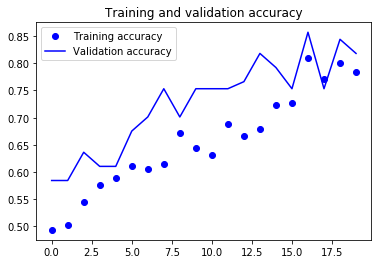

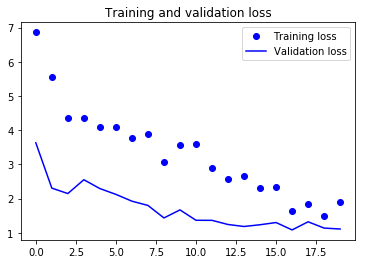

In [31]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [26]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1) 


NameError: name 'model' is not defined

In [33]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('importantconfusion_matrix.png', format='png')
    
    


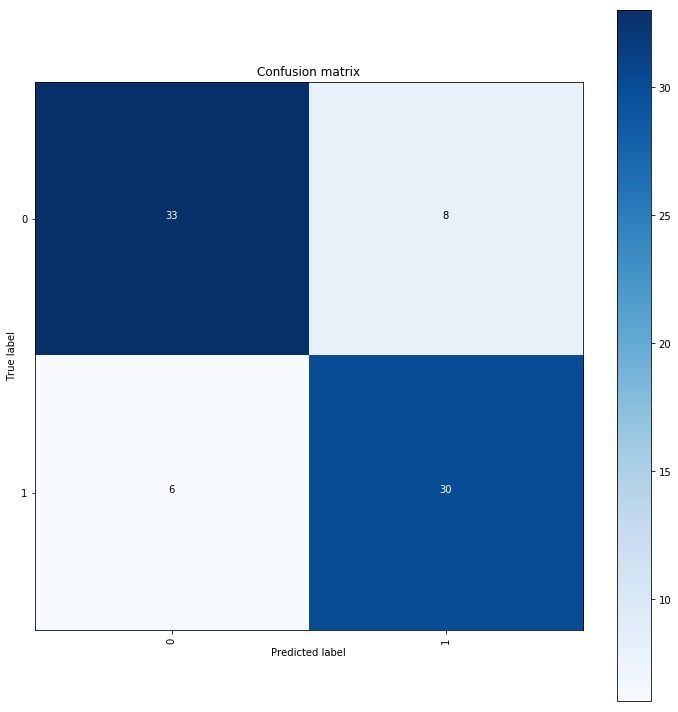

In [34]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
dict_characters = {0: '0', 1: '1'}
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 


In [25]:
x_test

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        